In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
import pandas as pd
df=pd.read_csv('/home/slv/expt/ramselvaraj/samplephotos.csv')

In [2]:
len(df)

87586

In [3]:
df.head()

,image_path,airplane,bird,drone,helicopter
0,/content/samplephotos/V_DRONE_059_0.jpg,[],[],"[277,70,25,24]",[]
1,/content/samplephotos/V_DRONE_059_1.jpg,[],[],"[275.061004638672,68.2784500122070,25.09722900...",[]
2,/content/samplephotos/V_DRONE_059_2.jpg,[],[],"[274.092285156250,67.2512283325195,25.96630859...",[]
3,/content/samplephotos/V_DRONE_059_3.jpg,[],[],"[273.078857421875,65.8087844848633,25.90567016...",[]
4,/content/samplephotos/V_DRONE_059_4.jpg,[],[],"[273.126342773438,65.0327758789063,25.08987426...",[]


In [4]:
class_name=[]
label=[]
boxes=[]
#

for index,row in df.iterrows():
 
  if row['airplane']!='[]':
    label.append(1)
    boxes.append(row['airplane'])
    class_name.append('airplane')
  elif row['bird']!='[]':
    label.append(2)
    boxes.append(row['bird'])
    class_name.append('bird')
  elif row['drone']!='[]':
    label.append(3)
    boxes.append(row['drone'])
    class_name.append('drone')
  elif row['helicopter']!='[]':
    label.append(4)
    boxes.append(row['helicopter'])
    class_name.append('helicopter')
  else:
    label.append(0)
    boxes.append('[]')
    class_name.append('background')





In [5]:
df['label']=label
df['class_name']=class_name
df['boxes']=boxes

In [6]:
df=df[df.boxes!='[]']

In [7]:
df['boxes'].head()

0                                       [277,70,25,24]
1    [275.061004638672,68.2784500122070,25.09722900...
2    [274.092285156250,67.2512283325195,25.96630859...
3    [273.078857421875,65.8087844848633,25.90567016...
4    [273.126342773438,65.0327758789063,25.08987426...
Name: boxes, dtype: object

In [8]:
image_path=[]
xmin=[]
ymin=[]
width=[]
height=[]
label=[]
class_name=[]

cnt=0
for index,row in df.iterrows():
  if row['boxes'].find(';')!=-1:
    #print(row['boxes'],index)
    cnt+=1

  res = row['boxes'].strip('][').split(';')
  for i in range(len(res)):

    box=res[i].split(',')
  
    try:
      box=[float(i) for i in box]
      xmin.append(box[0])
      ymin.append(box[1])
      width.append(box[2])
      height.append(box[3])

      image_path.append(row['image_path'])
      label.append(row['label'])
      class_name.append(row['class_name'])
    except:
      continue
print(cnt)
    





4124


In [9]:
len(xmin)

93862

In [10]:
data={
    'image_path':image_path,
    'label':label,
    'class_name':class_name,
    'xmin':xmin,
    'ymin':ymin,
    'width':width,
    'height':height
}

In [11]:
df=pd.DataFrame(data)

In [12]:
df.head()

,image_path,label,class_name,xmin,ymin,width,height
0,/content/samplephotos/V_DRONE_059_0.jpg,3,drone,277.000000,70.000000,25.000000,24.000000
1,/content/samplephotos/V_DRONE_059_1.jpg,3,drone,275.061005,68.278450,25.097229,24.138000
2,/content/samplephotos/V_DRONE_059_2.jpg,3,drone,274.092285,67.251228,25.966309,24.982742
3,/content/samplephotos/V_DRONE_059_3.jpg,3,drone,273.078857,65.808784,25.905670,24.962952
4,/content/samplephotos/V_DRONE_059_4.jpg,3,drone,273.126343,65.032776,25.089874,24.110710


In [13]:
df['xmax']=df['xmin']+df['width']
df['ymax']=df['ymin']+df['height']
df['area']=(df['xmax']-df['xmin'])*(df['ymax']-df['ymin'])

In [14]:
df.head()

,image_path,label,class_name,xmin,ymin,width,height,xmax,ymax,area
0,/content/samplephotos/V_DRONE_059_0.jpg,3,drone,277.000000,70.000000,25.000000,24.000000,302.000000,94.000000,600.000000
1,/content/samplephotos/V_DRONE_059_1.jpg,3,drone,275.061005,68.278450,25.097229,24.138000,300.158234,92.416451,605.796926
2,/content/samplephotos/V_DRONE_059_2.jpg,3,drone,274.092285,67.251228,25.966309,24.982742,300.058594,92.233971,648.709596
3,/content/samplephotos/V_DRONE_059_3.jpg,3,drone,273.078857,65.808784,25.905670,24.962952,298.984528,90.771736,646.681992
4,/content/samplephotos/V_DRONE_059_4.jpg,3,drone,273.126343,65.032776,25.089874,24.110710,298.216217,89.143486,604.934686


In [15]:
df['img_id']=df['image_path'].str.rstrip('.jpg').str.lstrip('/content/samplephotos/')


In [16]:
df.head()

,image_path,label,class_name,xmin,ymin,width,height,xmax,ymax,area,img_id
0,/content/samplephotos/V_DRONE_059_0.jpg,3,drone,277.000000,70.000000,25.000000,24.000000,302.000000,94.000000,600.000000,V_DRONE_059_0
1,/content/samplephotos/V_DRONE_059_1.jpg,3,drone,275.061005,68.278450,25.097229,24.138000,300.158234,92.416451,605.796926,V_DRONE_059_1
2,/content/samplephotos/V_DRONE_059_2.jpg,3,drone,274.092285,67.251228,25.966309,24.982742,300.058594,92.233971,648.709596,V_DRONE_059_2
3,/content/samplephotos/V_DRONE_059_3.jpg,3,drone,273.078857,65.808784,25.905670,24.962952,298.984528,90.771736,646.681992,V_DRONE_059_3
4,/content/samplephotos/V_DRONE_059_4.jpg,3,drone,273.126343,65.032776,25.089874,24.110710,298.216217,89.143486,604.934686,V_DRONE_059_4


In [18]:
df.to_csv("cleaned.csv")

In [19]:
#!cp /content/cleaned.csv /content/gdrive/MyDrive

# TRYING TEST TRAIN SPLIT

In [26]:
df=df[df['xmin']<640]
df=df[df['xmax']<640]
df=df[df['ymin']<512]
df=df[df['ymax']<512]


df = df.sample(frac = 1)

In [27]:
# make dictionary for class objects so we can call objects by their keys.
classes= {1:'airlplane',2:'bird',3:'drone',4:'helicopter'}

In [28]:
a=len(df)
b=int((80/100)*a)

In [29]:
train_df=df[:b]
valid_df=df[b:]

In [30]:
len(train_df)

73876

In [31]:
len(valid_df)

18470

In [26]:
#!cp /content/gdrive/MyDrive/samplephotos.zip /content

In [27]:
#!mkdir samplephotos

In [28]:
#!unzip /content/samplephotos.zip -d /content/

In [32]:
IMG_PATH='/home/slv/expt/ramselvaraj/hackathon2/content/samplephotos'

In [30]:
#smol fixes
train_df['image_path']='/content'+train_df['image_path'].astype('str')

/tmp/ipykernel_87775/1446685257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['image_path']='/content'+train_df['image_path'].astype('str')


In [31]:
train_df.head()

,image_path,label,class_name,xmin,ymin,width,height,xmax,ymax,area,img_id
75255,/content/content/samplephotos/V_DRONE_088_277.jpg,3,drone,467.732605,188.769745,38.551086,35.185608,506.283691,223.955353,1356.443411,V_DRONE_088_277
53106,/content/content/samplephotos/V_BIRD_041_184.jpg,2,bird,260.999997,283.000000,24.000000,19.500000,284.999997,302.499999,467.999987,V_BIRD_041_184
8318,/content/content/samplephotos/V_DRONE_087_4.jpg,3,drone,376.629883,184.918777,60.491852,51.569458,437.121735,236.488235,3119.532012,V_DRONE_087_4
17657,/content/content/samplephotos/V_DRONE_086_112.jpg,3,drone,482.556152,176.141571,48.478699,38.369904,531.034851,214.511475,1860.122995,V_DRONE_086_112
56634,/content/content/samplephotos/V_DRONE_008_145.jpg,3,drone,447.278107,242.198181,25.224548,17.765411,472.502655,259.963593,448.124478,V_DRONE_008_145


In [33]:
train_df_birds = train_df[train_df['class_name'] == 'bird']
len(train_df_birds)

15505

In [25]:
valid_df['image_path']='/content'+valid_df['image_path'].astype('str')

/tmp/ipykernel_8509/315699018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['image_path']='/content'+valid_df['image_path'].astype('str')


In [34]:
valid_df.head()

,image_path,label,class_name,xmin,ymin,width,height,xmax,ymax,area,img_id
89852,/content/samplephotos/V_AIRPLANE_027_129.jpg,1,airplane,318.693750,315.281250,91.011374,63.463992,409.705124,378.745242,5775.945102,V_AIRPLANE_027_129
71952,/content/samplephotos/V_AIRPLANE_045_120.jpg,1,airplane,336.476318,106.295898,32.698151,38.728210,369.174469,145.024109,1266.340859,V_AIRPLANE_045_120
50237,/content/samplephotos/V_HELICOPTER_048_191.jpg,4,helicopter,233.076923,186.538463,137.615387,93.461539,370.692310,280.000002,12861.745816,V_HELICOPTER_048_191
83391,/content/samplephotos/V_HELICOPTER_054_243.jpg,4,helicopter,198.800000,329.700000,62.100000,47.700000,260.900000,377.400000,2962.169999,V_HELICOPTER_054_243
54669,/content/samplephotos/V_DRONE_093_86.jpg,3,drone,329.266510,221.332962,38.959747,29.410858,368.226257,250.743820,1145.839602,V_DRONE_093_86


In [35]:
import os
import collections
import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing 


import xml.etree.ElementTree as ET

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data import SequentialSampler

In [35]:
!pip install albumentations

/bin/bash: /home/slv/anaconda3/envs/capstone/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [36]:
class VOCDataset(Dataset):
    
    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()
        
        self.image_ids = dataframe['img_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
    
    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        records = self.df[self.df['img_id'] == image_id]
        #print(f'{self.image_dir}/{image_id}.jpg')
        image = cv2.imread(f'{self.image_dir}/{image_id}.jpg', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        rows, cols = image.shape[:2]
        records.loc[records['xmin']>640.0,'xmin']=640.0
        records.loc[records['xmax']>640.0,'xmax']=640.0
        records.loc[records['ymin']>512.0,'ymin']=512.0
        records.loc[records['ymax']>512.0,'ymax']=512.0

        
        boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values
        #print(boxes)
       
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)
        
        label = records['label'].values
        labels = torch.as_tensor(label, dtype=torch.int64)
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        # target['masks'] = None
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd
        
        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
            target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1,0)
            
            return image, target
        
    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [37]:
def get_transform_train():
    return A.Compose([
        A.HorizontalFlip(p=0.4),
        A.RandomBrightnessContrast(p=0.2),
        ToTensorV2(p=1.0)
    ], bbox_params={'format':'pascal_voc', 'label_fields': ['labels']})

def get_transform_valid():
    return A.Compose([
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields':['labels']})

In [38]:
def collate_fn(batch):
    return tuple(zip(*batch))

#train_dataset = VOCDataset(train_df, IMG_PATH , get_transform_train())
train_dataset = VOCDataset(train_df_birds, IMG_PATH , get_transform_train())
valid_dataset = VOCDataset(valid_df, IMG_PATH, get_transform_valid())


# split the dataset in train and test set
indices = torch.randperm(len(train_dataset)).tolist()


train_data_loader = DataLoader(
    train_dataset,
    batch_size=10,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
device

device(type='cuda')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: num must be an integer with 1 <= num <= 4, not 5

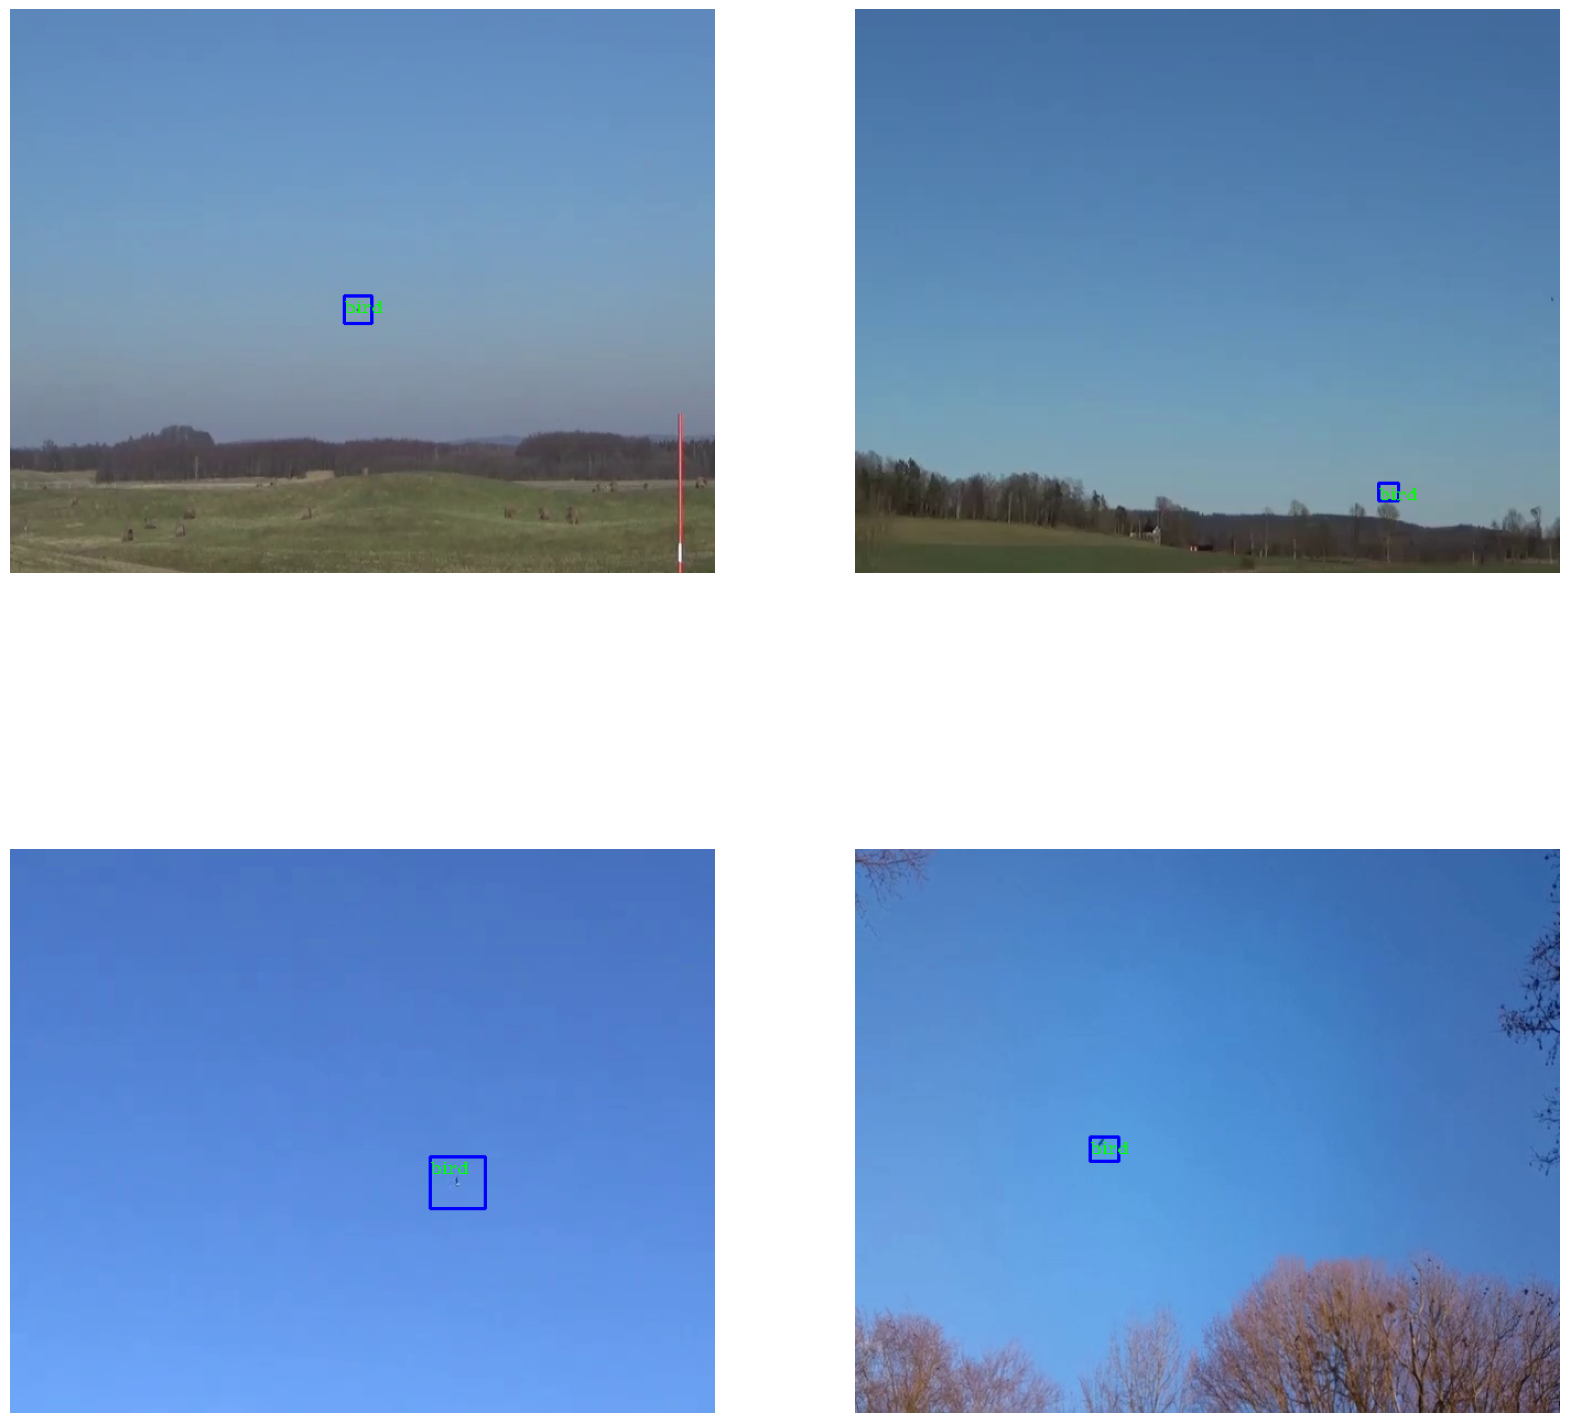

In [41]:
images, targets= next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

plt.figure(figsize=(20,20))
for i, (image, target) in enumerate(zip(images, targets)):
    plt.subplot(2,2, i+1)
    boxes = targets[i]['boxes'].cpu().numpy().astype(np.int32)
    sample = images[i].permute(1,2,0).cpu().numpy()
    names = targets[i]['labels'].cpu().numpy().astype(np.int64)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 0, 220), 2)
        cv2.putText(sample, classes[names[i]], (box[0],box[1]+15),cv2.FONT_HERSHEY_COMPLEX ,0.5,(0,220,0),1,cv2.LINE_AA)  

    plt.axis('off')
    plt.imshow(sample)

In [42]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [43]:
# load  a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

WEIGHTS_FILE = "./faster_rcnn_state.pth"

num_classes = 5

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the traines weights
model.load_state_dict(torch.load(WEIGHTS_FILE,map_location='cpu'))

model = model.to(device)

/home/slv/anaconda3/envs/capstone/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/slv/anaconda3/envs/capstone/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/slv/anaconda3/envs/capstone/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/slv/anaconda3/envs/capstone/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are de

In [36]:
num_classes = 5

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [44]:
#model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [46]:
#!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [47]:
#!git clone https://github.com/pytorch/vision.git
#!cd vision;cp references/detection/utils.py ../;cp references/detection/transforms.py ../;cp references/detection/coco_eval.py ../;cp references/detection/engine.py ../;cp references/detection/coco_utils.py ../

In [45]:
from engine import train_one_epoch, evaluate
import utils

In [46]:
# let's train it for 2 epochs
num_epochs = 1

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    #train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, valid_data_loader, device=device)

/home/slv/anaconda3/envs/capstone/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


creating index...
index created!
Test:  [   0/4541]  eta: 1:52:50  model_time: 1.2917 (1.2917)  evaluator_time: 0.0039 (0.0039)  time: 1.4911  data: 0.0960  max mem: 1695
Test:  [ 100/4541]  eta: 0:11:10  model_time: 0.1310 (0.1419)  evaluator_time: 0.0023 (0.0023)  time: 0.1382  data: 0.0032  max mem: 1695
Test:  [ 200/4541]  eta: 0:10:27  model_time: 0.1312 (0.1365)  evaluator_time: 0.0022 (0.0023)  time: 0.1386  data: 0.0032  max mem: 1695
Test:  [ 300/4541]  eta: 0:10:05  model_time: 0.1322 (0.1350)  evaluator_time: 0.0022 (0.0023)  time: 0.1393  data: 0.0032  max mem: 1695
Test:  [ 400/4541]  eta: 0:09:48  model_time: 0.1329 (0.1344)  evaluator_time: 0.0022 (0.0023)  time: 0.1402  data: 0.0032  max mem: 1695
Test:  [ 500/4541]  eta: 0:09:33  model_time: 0.1335 (0.1342)  evaluator_time: 0.0022 (0.0023)  time: 0.1408  data: 0.0032  max mem: 1695
Test:  [ 600/4541]  eta: 0:09:18  model_time: 0.1341 (0.1341)  evaluator_time: 0.0022 (0.0023)  time: 0.1413  data: 0.0032  max mem: 1695
T

In [41]:
!export PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512

/bin/bash: /home/slv/anaconda3/envs/capstone/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
torch.save(model.state_dict(), 'faster_rcnn_state.pth')

In [ ]:
!cp /content/faster_rcnn_state.pth /content/gdrive/MyDrive

In [ ]:
# load  a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

WEIGHTS_FILE = "./faster_rcnn_state.pth"

num_classes = 5

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the traines weights
model.load_state_dict(torch.load(WEIGHTS_FILE))

model = model.to(device)

In [ ]:
def obj_detector(img):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)


    img /= 255.0
    img = torch.from_numpy(img)
    img = img.unsqueeze(0)
    img = img.permute(0,3,1,2)
    
    model.eval()

    detection_threshold = 0.70
    
    img = list(im.to(device) for im in img)
    output = model(img)
    
    #print(output,"OUTPUT")
    for i , im in enumerate(img):
        boxes = output[i]['boxes'].data.cpu().numpy()
        scores = output[i]['scores'].data.cpu().numpy()
        labels = output[i]['labels'].data.cpu().numpy()

        labels = labels[scores >= detection_threshold]
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]

        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]
    
    sample = img[0].permute(1,2,0).cpu().numpy()
    sample = np.array(sample)
    boxes = output[0]['boxes'].data.cpu().numpy()
    name = output[0]['labels'].data.cpu().numpy()
    #print(name)
    scores = output[0]['scores'].data.cpu().numpy()
    boxes = boxes[scores >= detection_threshold].astype(np.int32)
    names = name.tolist()
    
    return names, boxes, sample,scores

In [ ]:
pred_path = "/home/slv/expt/ramselvaraj/Test_data_images/Test_data_images"
pred_files = [os.path.join(pred_path,f) for f in os.listdir(pred_path)]

plt.figure(figsize=(20,60))
for i, images in enumerate(pred_files):
    if i > 19:break
    plt.subplot(10,2,i+1)
    names,boxes,sample = obj_detector(images)
    print(boxes)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 220, 0), 2)
        cv2.putText(sample, classes[names[i]], (box[0],box[1]-5),cv2.FONT_HERSHEY_COMPLEX ,0.7,(220,0,0),1,cv2.LINE_AA)  
        
    plt.axis('off')
    plt.imshow(sample)
    plt.savefig('save_image.png', bbox_inches='tight')  # if you want to save result

In [ ]:
names,boxes,sample = obj_detector('/home/slv/expt/ramselvaraj/Test_data_images/Test_data_images/3.jpeg')
for i,box in enumerate(boxes):
    cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (0, 220, 0), 2)
    cv2.putText(sample, classes[names[i]], (box[0],box[1]-5),cv2.FONT_HERSHEY_COMPLEX ,0.7,(220,0,0),1,cv2.LINE_AA)
    plt.imshow(sample)
print(names,boxes)

In [ ]:
pred_files

In [ ]:
test_files

In [ ]:
test_files = []

for index,row in valid_df.iterrows():
    test_files.append("/home/slv/expt/ramselvaraj/hackathon2"+row['image_path']) 
    
names = []
boxes = []
plt.figure(figsize=(20,60))
for i, images in enumerate(test_files):
    if i > 19:break
    plt.subplot(10,2,i+1)
    names,boxes,sample,scores = obj_detector(images)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 220, 0), 2)
        cv2.putText(sample, classes[names[i]], (box[0],box[1]-5),cv2.FONT_HERSHEY_COMPLEX ,0.7,(220,0,0),1,cv2.LINE_AA)  
        
    plt.axis('off')
    plt.imshow(sample)
    plt.savefig('save_image.png', bbox_inches='tight')  # if you want to save result

In [ ]:
ans = pd.DataFrame(columns = ['Test Image','Prediction string'])

In [ ]:
ans

In [ ]:
def toCSV(path):
    #cols of pd dataframe
    Test_Image = []
    Prediction = []
    pred_path = "/home/slv/expt/ramselvaraj/Test_data_images/Test_data_images"
    pred_files = [os.path.join(pred_path,f) for f in os.listdir(pred_path)]
    print(pred_files)
    ansLIST = pd.DataFrame(columns = ['Test Image','Prediction string'])
    for i, images in enumerate(pred_files):
        #plt.subplot(10,2,i+1)
        
        names,boxes,sample,scores = obj_detector(images)
#         namesArr.append(names[0])
#         boxes.Arr.append()
        #print(boxes)
        if len(boxes) != 0:
            Test_Image.append(images.split('/')[-1])
            Prediction.append("{{{} {} {} {} {} {}}}".format(names[0]-1,scores[0],
                                                              boxes[0][0],
                                                             boxes[0][1],
                                                             boxes[0][2],
                                                             boxes[0][3]))
            #print(len(boxes))
#             row = pd.DataFrame(
#             {
#             'Test Image': [images.split('/')[-1]],
#             'Prediction string': "{{{} {} {} {} {} {}}}".format(names[0],scores[0],
#                                                               boxes[0][0],
#                                                              boxes[0][1],
#                                                              boxes[0][2],
#                                                              boxes[0][3])
#             })
            
            
        else:
#             row = pd.DataFrame(
#             {
#             'Test Image': [images.split('/')[-1]],
#             'Prediction string': "{{{} {} {} {} {} {}}}".format(names[0],scores[0],
#                                                               '',
#                                                              '',
#                                                              '',
#                                                              '')
#             })
            Test_Image.append(images.split('/')[-1])
            Prediction.append("{{{} {} {} {} {} {}}}".format(names[0]-1,scores[0],
                                                              '0',
                                                             '0',
                                                             '0',
                                                             '0'))
        #print(row)
    dc = {'Test Image' : Test_Image,
            'Prediction string': Prediction}
        #pd.concat([ansLIST,row])
        #print(ansLIST)
    return pd.DataFrame(dc)

In [ ]:
outputDF = toCSV('/home/slv/expt/ramselvaraj/Test_data_images/Test_data_images')
outputDF

In [ ]:
outputDF['sorting'] = outputDF['Test Image'].str.rstrip('.jpeg').astype(int)
outputDF = outputDF.sort_values(by = 'sorting')

In [ ]:
ignored = [23,27,29,67]
mask = outputDF['sorting'].isin(ignored)

# create the new DataFrame by selecting the rows that are not ignored
new_df = outputDF[~mask]
new_df

In [ ]:
new_df = new_df.drop('sorting',axis =1)
new_df.to_csv('submissionsFixedclasses.csv',index = False)

In [ ]:
def getAccuracy(df,path):
    namesArr = []
    boxesArr = []
    pred_path = "{}".format([path])
    pred_files = [os.path.join(pred_path,f) for f in os.listdir(pred_path)]
    for i, images in enumerate(pred_files):
        names,boxes,sample = obj_detector(images)
        namesArr.append(names[0])
        boxes.Arr.append()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# example predicted probabilities and true labels
y_pred_prob = [0.2, 0.4, 0.6, 0.8, 0.9]
y_true = [0, 0, 1, 1, 1]

# calculate false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()